## Exploration Of Segmenting and Clustering Neighborhoods in Toronto City 

### Install Important Python Library

In [1]:
!pip install geopy
!pip install folium
!pip install requests

In [2]:
import random
import requests
from geopy.geocoders import Nominatim
# from IPython.display import Image
# from IPython.core.display import HTML
# from IPython.display import display_html
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Load the dataset of Toronto with latitude and longitude coordinates
### Actually it's a canada dataset and we will extract data of Toronto_city and explore it.

In [3]:
df = pd.read_csv('canada_latlng.csv')
df

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


## let's extract the toronto's PostalCode, Borough, and Neighborhood from data 'df_data'
### Here we will focus to analysis on Borough that contains only the word Toronto. 

In [4]:
df_tor = df[df['Borough'].str.contains('Toronto', regex = False)]
df_tor =df_tor.reset_index()
df_tor.drop(columns = ['index'], inplace = True)

In [5]:
df_tor.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


### Dataframe has 7 Borough and 39 Neighborhoods

In [6]:
print('The dataframe has {} Borough and {} Neighborhood,'.format(len(df_tor['Borough'].unique()),
                                                                     df_tor['Neighborhood'].shape[0]))

The dataframe has 7 Borough and 39 Neighborhood,


## Let's Visualize the Toronto dataset
#### we use Folium for visualization of Neighborhoods in Toronto city. Folium is a great library for visualization of Neighborhoods and we can also see the result by zoom in and zoom out to collect more details.

In [7]:
# First import folium
import folium

#### Let's get the geographical coordinates if Toronto city

In [8]:
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent = 'foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [9]:
# latitude =43.6534817
# longitude =-79.3839347

#### Let's Visualize the Toronto Neighborhoods

In [10]:
# Visualize toronto city by using latitude and longitude
Toronto_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

In [11]:
# add markers to map
for lat, lng, label in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighborhood']):
    folium.CircleMarker([lat, lng],
                        radius = 5,
                        color = 'blue',
                        popup = label,
                        fill = True,
                        fill_color = 'yellow',
                        fill_capacity= 0.6,
                        parse_html = False).add_to(Toronto_map)
Toronto_map

Now using foursquare api to explore neighborhoods and segmemts
### Define all credential of foursquare API

In [12]:
client_id = 'JFDE3DLRH01NCGPY0YDMKANSSBGU1YQ4B1B2O2Y0Y0SXNJV0'
client_secret ='204X14B2W4OTPWFYGV3UCIHKPUYAZWL5I543BJREESMFWB3M'
version ='20180606'

print('client_id:', client_id)
print('client_secret:', client_secret)

client_id: JFDE3DLRH01NCGPY0YDMKANSSBGU1YQ4B1B2O2Y0Y0SXNJV0
client_secret: 204X14B2W4OTPWFYGV3UCIHKPUYAZWL5I543BJREESMFWB3M


Get the first neighborhoods of toronto dataset in dataframe

In [13]:
df_tor.loc[2,'Neighborhood']

'St. James Town'

Now get the latitude and longitude of Neighborhoods in dataframe

In [14]:
neighbor_lat = df_tor.loc[0,'Latitude']    # latitude of neighborhood
neighbor_lng = df_tor.loc[0,'Longitude']   # Longitude of neighborhood

neighbor_name = df_tor.loc[0,'Neighborhood']   # name of neoghborhood

print('Latitude and longitude values of {} and {},{}'.format(neighbor_name,neighbor_lat, neighbor_lng))

Latitude and longitude values of Regent Park, Harbourfront and 43.6542599,-79.3606359


### let's take 100 venues in 500 radius and try to extract tha data from generated url 

Now set the url for extracting data 

In [15]:
limit =100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}'.format(
    client_id, 
    client_secret, 
    version,
    neighbor_lat,
    neighbor_lng,
    limit, 
    radius)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=JFDE3DLRH01NCGPY0YDMKANSSBGU1YQ4B1B2O2Y0Y0SXNJV0&client_secret=204X14B2W4OTPWFYGV3UCIHKPUYAZWL5I543BJREESMFWB3M&v=20180606&ll=43.6542599,-79.3606359&limit=100&radius=500'

Send the 'get' and see the data  

In [16]:
result = requests.get(url).json()
result

{'meta': {'code': 200, 'requestId': '6168d9ff73481078987fdb5b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

Now we will define a function to extract the category of the venue

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Here we will clean the json data and give a frame of row and column

In [18]:
venues = result['response']['groups'][0]['items']

nearby_venue = pd.json_normalize(venues) # normalize the venues
# nearby_venue

# Filter the column of dataset
filtered_col = ['venue.name', 'venue.categories','venue.location.lat', 'venue.location.lng']
nearby_venue = nearby_venue.loc[:, filtered_col]
# nearby_venue

#Now filter the categories of the venue
nearby_venue['venue.categories'] = nearby_venue.apply(get_category_type, axis = 1)
# nearby_venue.head()
nearby_venue.columns = [col.split(".")[-1] for col in nearby_venue.columns]

nearby_venue.head()

,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,The Extension Room,Gym / Fitness Center,43.653313,-79.359725


In [19]:
# check the shape of dataset
print(nearby_venue.shape)

(46, 4)


Now check how many venues are returned in the range of 500 radius

In [20]:
print('Number of venues returned by foursquare:{}'.format(nearby_venue.shape[0]) )

Number of venues returned by foursquare:46


### Now we will explore all neighborhoods in Toronto 
for that we create a function 'getNearbyVenues' at this time, let's take limit 100 in range of 400 radius.

In [21]:
def getNearbyVenues(names, latitudes, longitudes, limit = 100, radius = 400):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create a url of foursquare api
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&limit={}&radius={}'.format(
            client_id, 
            client_secret, 
            version,
            lat,
            lng,
            limit, 
            radius)
        # send a get requests
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Get relevant information from each venue 
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['location']['lat'],
        v['venue']['location']['lng'],
        v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighbor_Lat', 
                  'Neighbor_Lng', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

    
    return(nearby_venues)

### Now set the all value in function to get the data

In [22]:
toronto_venues = getNearbyVenues(names = df_tor['Neighborhood'],
                                latitudes = df_tor['Latitude'],
                                longitudes = df_tor['Longitude'])
# toronto_venues.head()

Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Enclave of M5E
St. James Town, Cabbagetown
First Canadi

Look the shape of the resulting dataset

In [23]:
toronto_venues.shape

(1266, 7)

Let's check how many venues are got from each neighborhood

In [24]:
toronto_venues.groupby(by ='Neighborhood').count().sort_values(by = 'Venue', ascending = False)

,Neighbor_Lat,Neighbor_Lng,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Richmond, Adelaide, King",100,100,100,100,100,100
"Toronto Dominion Centre, Design Exchange",100,100,100,100,100,100
"Harbourfront East, Union Station, Toronto Islands",100,100,100,100,100,100
"Garden District, Ryerson",100,100,100,100,100,100
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
"First Canadian Place, Underground city",100,100,100,100,100,100
Central Bay Street,77,77,77,77,77,77
Enclave of M5E,66,66,66,66,66,66
"Kensington Market, Chinatown, Grange Park",60,60,60,60,60,60


Let's find out how many unique categories can be curated from all the returned venues

In [25]:
print('There are {} unique categories'.format(len(toronto_venues['Venue Category'].unique())))

There are 206 unique categories


### Let's check the result of one Neighborhood

In [26]:
toronto_venues[toronto_venues.Neighborhood =='Davisville North']

,Neighborhood,Neighbor_Lat,Neighbor_Lng,Venue,Venue Latitude,Venue Longitude,Venue Category
814,Davisville North,43.712751,-79.390197,Summerhill Market North,43.715499,-79.392881,Food & Drink Shop
815,Davisville North,43.712751,-79.390197,Homeway Restaurant & Brunch,43.712641,-79.391557,Breakfast Spot
816,Davisville North,43.712751,-79.390197,Winners,43.713236,-79.393873,Department Store
817,Davisville North,43.712751,-79.390197,900 Mount Pleasant - Residents Gym,43.711671,-79.391767,Gym / Fitness Center
818,Davisville North,43.712751,-79.390197,Circle K,43.712834,-79.391554,Convenience Store
819,Davisville North,43.712751,-79.390197,Gym,43.713126,-79.393537,Gym


## Now Analyze Each Neighborhood Based On Venue Categories

In [27]:
# One hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix = "", prefix_sep ="")

# Add neighborhood column back to the dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# Move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check the shape of the dataframe

In [28]:
toronto_onehot.shape

(1266, 206)

### Let's group row by neighborhood and by taking the mean of the frequency of occurance of each category

In [29]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head(11)

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.045455,0.0,0.000000,0.0,0.00
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
2,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.090909,0.090909,0.090909,0.181818,0.090909,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
3,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
5,Church and Wellesley,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.017241,0.0,0.000000,0.0,0.0,0.000000,0.0,0.017241,0.0,0.00
6,"Commerce Court, Victoria Hotel",0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.03,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.010000,0.0,0.000000,0.0,0.01
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.038462,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00
9,"Dufferin, Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00


### Let's check the shape of new dataframe

In [30]:
toronto_grouped.shape

(36, 206)

### Let's print each neighborhood along with the top 10 most common venues

In [31]:
num_top_venues = 10

for hood in toronto_grouped['Neighborhood']:
    print()
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


               venue  freq
0           Pharmacy  0.09
1                Pub  0.05
2     Breakfast Spot  0.05
3           Fountain  0.05
4  French Restaurant  0.05
5         Restaurant  0.05
6           Beer Bar  0.05
7             Lounge  0.05
8       Liquor Store  0.05
9       Cocktail Bar  0.05



                venue  freq
0                Café  0.20
1      Breakfast Spot  0.13
2         Coffee Shop  0.13
3                 Bar  0.07
4           Nightclub  0.07
5        Climbing Gym  0.07
6  Italian Restaurant  0.07
7          Restaurant  0.07
8       Grocery Store  0.07
9                 Gym  0.07



                 venue  freq
0       Airport Lounge  0.18
1                Plane  0.09
2              Airport  0.09
3                  Bar  0.09
4          Coffee Shop  0.09
5  Rental Car Location  0.09
6             Boutique  0.09
7     Airport Terminal  0.09
8         Airport Gate  0.09
9   Airport Food Court  0.09



                 venue  freq
0          Coffee Shop  0.21
1       

9   Seafood Restaurant  0.03



                     venue  freq
0                     Café  0.17
1                   Bakery  0.09
2              Yoga Studio  0.04
3             Dessert Shop  0.04
4  Comfort Food Restaurant  0.04
5              College Gym  0.04
6    College Arts Building  0.04
7               Restaurant  0.04
8             Noodle House  0.04
9              Flower Shop  0.04




### Let's put all 10 venues in dataframe

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now create a new dataframe to display the top 10 venues for each neighborhood

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbor_venue_sorted = pd.DataFrame(columns=columns) 
neighbor_venue_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighbor_venue_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighbor_venue_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Pharmacy,Moroccan Restaurant,Cocktail Bar,Beer Bar,Italian Restaurant,Pub,Comfort Food Restaurant,Fountain,French Restaurant,Liquor Store
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast Spot,Coffee Shop,Nightclub,Bar,Italian Restaurant,Restaurant,Climbing Gym,Grocery Store,Pet Store
2,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Coffee Shop,Airport Terminal,Plane,Rental Car Location,Bar,Boutique,Airport Gate,Airport,Airport Food Court
3,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Bank,Chinese Restaurant,Japanese Restaurant,Restaurant,Sushi Restaurant,Spa,Café
4,Christie,Café,Grocery Store,Coffee Shop,Nightclub,Candy Store,Baby Store,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant


## Neighborhoods Clustering
import k menas cluster library to cluster the neighborhood of Toronto. Here we use elbow method to find the optimal number of cluster.

In [34]:
from sklearn.cluster import KMeans

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood',1) # drop the column Neighborhood

C:\Users\Surya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


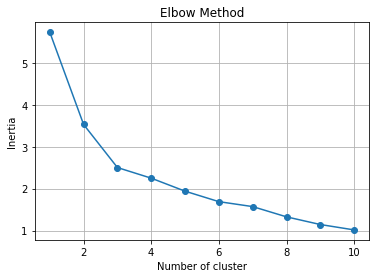

In [45]:
# Elbow method 
list1 =[]
for i in range(1,11):
    kmeans= KMeans(n_clusters = i, random_state= 0)
    kmeans.fit(toronto_grouped_clustering)
    
    # intertia = wcss(within cluster sum of squares) that menas how far the points within the cluster are.
    list1.append(kmeans.inertia_)

# create the score plot
plt.plot(range(1,11), list1, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.grid()
plt.show()

## Take K equal to 5 for best cluster beacuse inertia is starting to reduce.

In [46]:
k = 5
kmeans = KMeans(n_clusters = k, random_state =0).fit(toronto_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 4, 2, 1, 1, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [37]:
# add clustering labels
neighbor_venue_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

toronto_merged = df_tor

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbor_venue_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Breakfast Spot,Bakery,Gym / Fitness Center,Health Food Store,Electronics Store,Distribution Center,Pub,Restaurant,1.0
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Coffee Shop,Clothing Store,Café,Hotel,Sandwich Place,Burger Joint,Tanning Salon,Sporting Goods Shop,Hookah Bar,Chinese Restaurant,1.0
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Hotel,Coffee Shop,Restaurant,Cocktail Bar,Park,Italian Restaurant,Café,Gastropub,American Restaurant,Bistro,1.0
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Trail,Wine Bar,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,4.0
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Pharmacy,Moroccan Restaurant,Cocktail Bar,Beer Bar,Italian Restaurant,Pub,Comfort Food Restaurant,Fountain,French Restaurant,Liquor Store,1.0


Convert cluster label into integer

In [38]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].fillna(0)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype('Int64')
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,Coffee Shop,Park,Breakfast Spot,Bakery,Gym / Fitness Center,Health Food Store,Electronics Store,Distribution Center,Pub,Restaurant,1
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,Coffee Shop,Clothing Store,Café,Hotel,Sandwich Place,Burger Joint,Tanning Salon,Sporting Goods Shop,Hookah Bar,Chinese Restaurant,1
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,Hotel,Coffee Shop,Restaurant,Cocktail Bar,Park,Italian Restaurant,Café,Gastropub,American Restaurant,Bistro,1
3,M4E,East Toronto,The Beaches,43.676357,-79.293031,Trail,Wine Bar,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,4
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,Pharmacy,Moroccan Restaurant,Cocktail Bar,Beer Bar,Italian Restaurant,Pub,Comfort Food Restaurant,Fountain,French Restaurant,Liquor Store,1


### Create the map of final dataset

In [39]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
# Here number of cluster = 5
kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], 
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Five Cluster
### Cluster 1

In [40]:
cluster_0 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_0

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
18,Central Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
19,Central Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
21,Central Toronto,Park,Trail,Wine Bar,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,0
25,West Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
33,Downtown Toronto,Park,Bike Trail,Playground,Campground,Wine Bar,Department Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,0


### Cluster 2

In [41]:
cluster_1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_1

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Downtown Toronto,Coffee Shop,Park,Breakfast Spot,Bakery,Gym / Fitness Center,Health Food Store,Electronics Store,Distribution Center,Pub,Restaurant,1
1,Downtown Toronto,Coffee Shop,Clothing Store,Café,Hotel,Sandwich Place,Burger Joint,Tanning Salon,Sporting Goods Shop,Hookah Bar,Chinese Restaurant,1
2,Downtown Toronto,Hotel,Coffee Shop,Restaurant,Cocktail Bar,Park,Italian Restaurant,Café,Gastropub,American Restaurant,Bistro,1
4,Downtown Toronto,Pharmacy,Moroccan Restaurant,Cocktail Bar,Beer Bar,Italian Restaurant,Pub,Comfort Food Restaurant,Fountain,French Restaurant,Liquor Store,1
5,Downtown Toronto,Coffee Shop,Sandwich Place,Italian Restaurant,Bank,Chinese Restaurant,Japanese Restaurant,Restaurant,Sushi Restaurant,Spa,Café,1
6,Downtown Toronto,Café,Grocery Store,Coffee Shop,Nightclub,Candy Store,Baby Store,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,1
7,Downtown Toronto,Coffee Shop,Café,Sushi Restaurant,Thai Restaurant,Hotel,Asian Restaurant,Japanese Restaurant,Salad Place,Steakhouse,Bakery,1
8,West Toronto,Bakery,Grocery Store,Gym / Fitness Center,Middle Eastern Restaurant,Music Venue,Park,Bar,Bank,Pharmacy,Aquarium,1
10,Downtown Toronto,Coffee Shop,Aquarium,Café,Restaurant,Plaza,Pizza Place,Italian Restaurant,History Museum,Sporting Goods Shop,Sports Bar,1
11,West Toronto,Bar,Coffee Shop,Vietnamese Restaurant,Asian Restaurant,Men's Store,Wine Bar,Greek Restaurant,New American Restaurant,Korean Restaurant,Japanese Restaurant,1


### Cluster 3

In [42]:
cluster_2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_2

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,East York/East Toronto,Park,Convenience Store,Wine Bar,Dessert Shop,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,2
22,West Toronto,Park,Wine Bar,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,2
23,Central Toronto,Park,Wine Bar,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,2


### Cluster 4

In [43]:
cluster_3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_3

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
29,Central Toronto,Gym,Trail,Restaurant,Wine Bar,Deli / Bodega,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,3


### Cluster 5

In [44]:
cluster_4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster_4

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
3,East Toronto,Trail,Wine Bar,Department Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Dog Run,Distribution Center,Discount Store,4
